# Basic interaction with MGnify
1. search data
2. get data
3. compare to your data
4. compare to ncbi data

In [2]:
# Connection to MGnify API

# this repo is not maintained, or less than jsonapi-requests
# consider a dep change
from jsonapi_client import Session as APISession
from jsonapi_client import Modifier
import requests

# Dataframes and display
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Data transformation
from functools import reduce

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.graph_objects as go
%matplotlib inline 

# Create signature of MAGs for comparison against database
import sourmash
import glob
import time
from pathlib import PurePath as pp
from Bio import SeqIO

# Warning verbosity
import warnings 
warnings.filterwarnings(action="ignore")



## Query genomes

For the genome dataset, use genomes endpoint.
A complete list of endpoints can be found at https://www.ebi.ac.uk/metagenomics/api/v1/.

In [3]:
endpoint_name = 'genomes'
r = requests.get(f"https://www.ebi.ac.uk/metagenomics/api/v1/{endpoint_name}")
r.json()['data'][0]


{'type': 'genomes',
 'id': 'MGYG000485643',
 'attributes': {'genome-id': 32559,
  'geographic-origin': 'not provided',
  'geographic-range': [],
  'accession': 'MGYG000485643',
  'ena-genome-accession': None,
  'ena-sample-accession': 'SAMN10841222',
  'ena-study-accession': None,
  'ncbi-genome-accession': None,
  'ncbi-sample-accession': None,
  'ncbi-study-accession': 'PRJNA352798',
  'img-genome-accession': None,
  'patric-genome-accession': None,
  'length': 1754190,
  'num-contigs': 40,
  'n-50': 90205,
  'gc-content': 33.17,
  'type': 'MAG',
  'completeness': 92.24,
  'contamination': 0.0,
  'rna-5s': 0.0,
  'rna-16s': 0.0,
  'rna-23s': 0.0,
  'trnas': 15.0,
  'nc-rnas': 14,
  'num-proteins': 1567,
  'eggnog-coverage': 84.56,
  'ipr-coverage': 87.87,
  'taxon-lineage': 'd__Bacteria;p__Marinisomatota;c__Marinisomatia;o__Marinisomatales;f__UBA1611;g__TMED80;s__TMED80 sp002170405',
  'num-genomes-total': 5,
  'pangenome-size': 1816,
  'pangenome-core-size': 670,
  'pangenome-access


## Get information for a specific genus or species

Examples: Search for available ressources for a specific genus or species of interest.

- Listeria
- Listeria monocytogenes

The taxon-lineage field contains domain, phylum, class, order, family, genus, species, subspecies as

`d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria` monocytogenes(example for Listeria monocytogenes).

The filter can use the full lineage
`d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria` or only part of it `g__Listeria` or `Listeria`.


In [4]:
genus_filter = 'Listeria'
species_filter = 'Listeria monocytogenes'

with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    search_filter = Modifier(f"taxon_lineage={genus_filter}")
    resources = map(lambda r: r.json, mgnify.iterate(endpoint_name, filter=search_filter))
    resources_df = pd.json_normalize(resources)

In [5]:
# Display the table containing the results of the query
resources_df

,type,id,attributes.genome-id,attributes.geographic-origin,attributes.geographic-range,attributes.accession,attributes.ena-sample-accession,attributes.ncbi-genome-accession,attributes.ncbi-study-accession,attributes.length,attributes.num-contigs,attributes.n-50,attributes.gc-content,attributes.type,attributes.completeness,attributes.contamination,attributes.rna-5s,attributes.rna-16s,attributes.rna-23s,attributes.trnas,attributes.nc-rnas,attributes.num-proteins,attributes.eggnog-coverage,attributes.ipr-coverage,attributes.taxon-lineage,attributes.num-genomes-total,attributes.last-update,attributes.first-created,relationships.biome.data.id,relationships.biome.data.type,relationships.catalogue.data.id,relationships.catalogue.data.type,attributes.ncbi-sample-accession,attributes.pangenome-size,attributes.pangenome-core-size,attributes.pangenome-accessory-size
0,genomes,MGYG000478007,30632,Asia,[],MGYG000478007,SAMN02709433,GCA_003679455,PRJNA215355,2934839,97,61291,37.93,MAG,99.98,0.68,94.96,82.84,82.32,20.0,91,2890,97.85,92.39,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes,1,2024-05-13T00:13:14.754212,2024-05-13T00:13:14.750578,root:Environmental:Aquatic:Marine,biomes,marine-v2-0,genome-catalogues,NaN,NaN,NaN,NaN
1,genomes,MGYG000002392,6517,not provided,[NA],MGYG000002392,NaN,NaN,PRJNA486730,2941624,14,443696,37.79,Isolate,99.45,0.00,94.96,99.67,99.83,20.0,105,2895,98.20,92.92,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes,2,2024-01-23T13:28:36.633218,2021-12-07T19:05:27.616284,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0-2,genome-catalogues,SAMN09947982,2975.0,2760.0,215.0
2,genomes,MGYG000002325,6025,North America,"[North America, Europe, NA]",MGYG000002325,NaN,NaN,PRJNA167876,3017944,1,3017944,37.96,Isolate,99.45,0.00,94.96,99.67,99.79,20.0,108,2967,97.84,92.25,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes_B,7,2024-01-23T13:28:16.151141,2021-12-07T18:49:57.206690,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0-2,genome-catalogues,SAMN07124731,3286.0,2650.0,636.0
3,genomes,MGYG000001395,5358,not provided,[],MGYG000001395,NaN,NaN,PRJNA224116,2892121,17,1455432,37.33,Isolate,99.45,0.55,94.96,93.93,99.83,18.0,86,2880,97.15,91.77,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria innocua,1,2024-01-23T13:27:36.174727,2021-12-07T18:25:36.386977,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0-2,genome-catalogues,SAMN02299452,NaN,NaN,NaN
4,genomes,MGYG000001298,8569,Europe,[Europe],MGYG000001298,NaN,NaN,PRJNA224116,2598321,4,1486973,41.47,Isolate,99.45,0.00,94.96,99.67,99.83,20.0,64,2561,95.28,91.88,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria grayi,2,2024-01-23T13:30:16.899078,2021-12-07T20:02:11.105691,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0-2,genome-catalogues,SAMN00001446,2552.0,2552.0,0.0



Query the database with the 'Listeria monocytogenes' filter and store the results in a Pandas DataFrame.



In [6]:
with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    search_filter_2 = Modifier(f"taxon_lineage={species_filter}")
    resources_2 = map(lambda r: r.json, mgnify.iterate(endpoint_name, filter=search_filter_2))
    resources_df_2 = pd.json_normalize(resources_2)

In [7]:
resources_df_2

,type,id,attributes.genome-id,attributes.geographic-range,attributes.geographic-origin,attributes.accession,attributes.ena-sample-accession,attributes.ncbi-genome-accession,attributes.ncbi-study-accession,attributes.length,attributes.num-contigs,attributes.n-50,attributes.gc-content,attributes.type,attributes.completeness,attributes.contamination,attributes.rna-5s,attributes.rna-16s,attributes.rna-23s,attributes.trnas,attributes.nc-rnas,attributes.num-proteins,attributes.eggnog-coverage,attributes.ipr-coverage,attributes.taxon-lineage,attributes.num-genomes-total,attributes.last-update,attributes.first-created,relationships.catalogue.data.id,relationships.catalogue.data.type,relationships.biome.data.id,relationships.biome.data.type,attributes.ncbi-sample-accession,attributes.pangenome-size,attributes.pangenome-core-size,attributes.pangenome-accessory-size
0,genomes,MGYG000478007,30632,[],Asia,MGYG000478007,SAMN02709433,GCA_003679455,PRJNA215355,2934839,97,61291,37.93,MAG,99.98,0.68,94.96,82.84,82.32,20.0,91,2890,97.85,92.39,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes,1,2024-05-13T00:13:14.754212,2024-05-13T00:13:14.750578,marine-v2-0,genome-catalogues,root:Environmental:Aquatic:Marine,biomes,NaN,NaN,NaN,NaN
1,genomes,MGYG000002392,6517,[NA],not provided,MGYG000002392,NaN,NaN,PRJNA486730,2941624,14,443696,37.79,Isolate,99.45,0.00,94.96,99.67,99.83,20.0,105,2895,98.20,92.92,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes,2,2024-01-23T13:28:36.633218,2021-12-07T19:05:27.616284,human-gut-v2-0-2,genome-catalogues,root:Host-associated:Human:Digestive system:Large intestine,biomes,SAMN09947982,2975.0,2760.0,215.0
2,genomes,MGYG000002325,6025,"[North America, Europe, NA]",North America,MGYG000002325,NaN,NaN,PRJNA167876,3017944,1,3017944,37.96,Isolate,99.45,0.00,94.96,99.67,99.79,20.0,108,2967,97.84,92.25,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes_B,7,2024-01-23T13:28:16.151141,2021-12-07T18:49:57.206690,human-gut-v2-0-2,genome-catalogues,root:Host-associated:Human:Digestive system:Large intestine,biomes,SAMN07124731,3286.0,2650.0,636.0


In [8]:
resources_df.to_parquet('Listeria_resources.parquet')
listeria_df = pd.read_parquet('Listeria_resources.parquet')
listeria_df

,type,id,attributes.genome-id,attributes.geographic-origin,attributes.geographic-range,attributes.accession,attributes.ena-sample-accession,attributes.ncbi-genome-accession,attributes.ncbi-study-accession,attributes.length,attributes.num-contigs,attributes.n-50,attributes.gc-content,attributes.type,attributes.completeness,attributes.contamination,attributes.rna-5s,attributes.rna-16s,attributes.rna-23s,attributes.trnas,attributes.nc-rnas,attributes.num-proteins,attributes.eggnog-coverage,attributes.ipr-coverage,attributes.taxon-lineage,attributes.num-genomes-total,attributes.last-update,attributes.first-created,relationships.biome.data.id,relationships.biome.data.type,relationships.catalogue.data.id,relationships.catalogue.data.type,attributes.ncbi-sample-accession,attributes.pangenome-size,attributes.pangenome-core-size,attributes.pangenome-accessory-size
0,genomes,MGYG000478007,30632,Asia,[],MGYG000478007,SAMN02709433,GCA_003679455,PRJNA215355,2934839,97,61291,37.93,MAG,99.98,0.68,94.96,82.84,82.32,20.0,91,2890,97.85,92.39,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes,1,2024-05-13T00:13:14.754212,2024-05-13T00:13:14.750578,root:Environmental:Aquatic:Marine,biomes,marine-v2-0,genome-catalogues,None,NaN,NaN,NaN
1,genomes,MGYG000002392,6517,not provided,[NA],MGYG000002392,None,None,PRJNA486730,2941624,14,443696,37.79,Isolate,99.45,0.00,94.96,99.67,99.83,20.0,105,2895,98.20,92.92,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes,2,2024-01-23T13:28:36.633218,2021-12-07T19:05:27.616284,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0-2,genome-catalogues,SAMN09947982,2975.0,2760.0,215.0
2,genomes,MGYG000002325,6025,North America,"[North America, Europe, NA]",MGYG000002325,None,None,PRJNA167876,3017944,1,3017944,37.96,Isolate,99.45,0.00,94.96,99.67,99.79,20.0,108,2967,97.84,92.25,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes_B,7,2024-01-23T13:28:16.151141,2021-12-07T18:49:57.206690,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0-2,genome-catalogues,SAMN07124731,3286.0,2650.0,636.0
3,genomes,MGYG000001395,5358,not provided,[],MGYG000001395,None,None,PRJNA224116,2892121,17,1455432,37.33,Isolate,99.45,0.55,94.96,93.93,99.83,18.0,86,2880,97.15,91.77,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria innocua,1,2024-01-23T13:27:36.174727,2021-12-07T18:25:36.386977,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0-2,genome-catalogues,SAMN02299452,NaN,NaN,NaN
4,genomes,MGYG000001298,8569,Europe,[Europe],MGYG000001298,None,None,PRJNA224116,2598321,4,1486973,41.47,Isolate,99.45,0.00,94.96,99.67,99.83,20.0,64,2561,95.28,91.88,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria grayi,2,2024-01-23T13:30:16.899078,2021-12-07T20:02:11.105691,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0-2,genome-catalogues,SAMN00001446,2552.0,2552.0,0.0



Query and save the dataset as parquet file

To query the whole dataset, we can use the same method as previously. The only difference is that no filter is passed to the query.

Warning: Querying without filter is computationally expensive and will take time.

A pre-fetched copy of the data (as of 8 November 2022) is available in ../example-data/genomes/all_genome_resources.parquet.

In [10]:
# Careful, this takes a while to run
# on the order level, the query takes 
domain_filter = 'Bacteria'
order_filter = 'Lactobacillales'

with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    search_filter_3 = Modifier(f"taxon_lineage={order_filter}")
    resources_all = map(lambda r: r.json, mgnify.iterate(endpoint_name, filter=search_filter_3))
    resources_all_df = pd.json_normalize(resources_all)

resources_all_df
resources_all_df.to_parquet('latest_genome_resources.parquet')

ConnectionError: HTTPSConnectionPool(host='www.ebi.ac.uk', port=443): Max retries exceeded with url: /metagenomics/api/v1/genomes?taxon_lineage=Lactobacillales (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7efb37ff13c0>: Failed to establish a new connection: [Errno 113] No route to host'))

## Spark session to load all that data

In [11]:
from pyspark.sql import SparkSession

import pyspark.sql.functions as F
import pyspark

In [25]:
pyspark.conf.SparkConf().set("spark.sql.debug.maxToStringFields", 500)

In [20]:
spark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/04 12:06:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/02/04 12:06:03 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [21]:
all_genomes_df = spark.read.parquet('latest_genome_resources.parquet')

In [22]:
all_genomes_df.count(), len(all_genomes_df.columns)

(476, 37)

In [26]:
all_genomes_df.describe().show(truncate=False, vertical=True)

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `attributes`.`genome-id` cannot be resolved. Did you mean one of the following? [`attributes.genome-id`, `attributes.pangenome-size`, `attributes.length`, `attributes.n-50`, `attributes.rna-5s`].;
'Aggregate [map(cast(count as string), cast(count(type#0) as string), cast(mean as string), cast(avg(try_cast(type#0 as double)) as string), cast(stddev as string), cast(stddev(try_cast(type#0 as double)) as string), cast(min as string), cast(min(type#0) as string), cast(max as string), cast(max(type#0) as string)) AS type#377, map(cast(count as string), cast(count(id#1) as string), cast(mean as string), cast(avg(try_cast(id#1 as double)) as string), cast(stddev as string), cast(stddev(try_cast(id#1 as double)) as string), cast(min as string), cast(min(id#1) as string), cast(max as string), cast(max(id#1) as string)) AS id#382, map(cast(count as string), cast(count('attributes.genome-id) as string), cast(mean as string), cast(avg('attributes.genome-id) as string), cast(stddev as string), cast('stddev('attributes.genome-id) as string), cast(min as string), cast(min('attributes.genome-id) as string), cast(max as string), cast(max('attributes.genome-id) as string)) AS attributes.genome-id#387, map(cast(count as string), cast(count('attributes.geographic-origin) as string), cast(mean as string), cast(avg(try_cast('attributes.geographic-origin as double)) as string), cast(stddev as string), cast('stddev(try_cast('attributes.geographic-origin as double)) as string), cast(min as string), cast(min('attributes.geographic-origin) as string), cast(max as string), cast(max('attributes.geographic-origin) as string)) AS attributes.geographic-origin#392, map(cast(count as string), cast(count('attributes.geographic-range) as string), cast(mean as string), cast(avg(try_cast('attributes.geographic-range as double)) as string), cast(stddev as string), cast('stddev(try_cast('attributes.geographic-range as double)) as string), cast(min as string), cast(min('attributes.geographic-range) as string), cast(max as string), cast(max('attributes.geographic-range) as string)) AS attributes.geographic-range#397, map(cast(count as string), cast(count('attributes.accession) as string), cast(mean as string), cast(avg(try_cast('attributes.accession as double)) as string), cast(stddev as string), cast('stddev(try_cast('attributes.accession as double)) as string), cast(min as string), cast(min('attributes.accession) as string), cast(max as string), cast(max('attributes.accession) as string)) AS attributes.accession#402, map(cast(count as string), cast(count('attributes.ena-sample-accession) as string), cast(mean as string), cast(avg(try_cast('attributes.ena-sample-accession as double)) as string), cast(stddev as string), cast('stddev(try_cast('attributes.ena-sample-accession as double)) as string), cast(min as string), cast(min('attributes.ena-sample-accession) as string), cast(max as string), cast(max('attributes.ena-sample-accession) as string)) AS attributes.ena-sample-accession#407, map(cast(count as string), cast(count('attributes.ncbi-genome-accession) as string), cast(mean as string), cast(avg(try_cast('attributes.ncbi-genome-accession as double)) as string), cast(stddev as string), cast('stddev(try_cast('attributes.ncbi-genome-accession as double)) as string), cast(min as string), cast(min('attributes.ncbi-genome-accession) as string), cast(max as string), cast(max('attributes.ncbi-genome-accession) as string)) AS attributes.ncbi-genome-accession#412, map(cast(count as string), cast(count('attributes.ncbi-study-accession) as string), cast(mean as string), cast(avg(try_cast('attributes.ncbi-study-accession as double)) as string), cast(stddev as string), cast('stddev(try_cast('attributes.ncbi-study-accession as double)) as string), cast(min as string), cast(min('attributes.ncbi-study-accession) as string), cast(max as string), cast(max('attributes.ncbi-study-accession) as string)) AS attributes.ncbi-study-accession#417, map(cast(count as string), cast(count('attributes.length) as string), cast(mean as string), cast(avg('attributes.length) as string), cast(stddev as string), cast('stddev('attributes.length) as string), cast(min as string), cast(min('attributes.length) as string), cast(max as string), cast(max('attributes.length) as string)) AS attributes.length#422, map(cast(count as string), cast(count('attributes.num-contigs) as string), cast(mean as string), cast(avg('attributes.num-contigs) as string), cast(stddev as string), cast('stddev('attributes.num-contigs) as string), cast(min as string), cast(min('attributes.num-contigs) as string), cast(max as string), cast(max('attributes.num-contigs) as string)) AS attributes.num-contigs#427, map(cast(count as string), cast(count('attributes.n-50) as string), cast(mean as string), cast(avg('attributes.n-50) as string), cast(stddev as string), cast('stddev('attributes.n-50) as string), cast(min as string), cast(min('attributes.n-50) as string), cast(max as string), cast(max('attributes.n-50) as string)) AS attributes.n-50#432, map(cast(count as string), cast(count('attributes.gc-content) as string), cast(mean as string), cast(avg('attributes.gc-content) as string), cast(stddev as string), cast('stddev('attributes.gc-content) as string), cast(min as string), cast(min('attributes.gc-content) as string), cast(max as string), cast(max('attributes.gc-content) as string)) AS attributes.gc-content#437, map(cast(count as string), cast(count('attributes.type) as string), cast(mean as string), cast(avg(try_cast('attributes.type as double)) as string), cast(stddev as string), cast('stddev(try_cast('attributes.type as double)) as string), cast(min as string), cast(min('attributes.type) as string), cast(max as string), cast(max('attributes.type) as string)) AS attributes.type#442, map(cast(count as string), cast(count('attributes.completeness) as string), cast(mean as string), cast(avg('attributes.completeness) as string), cast(stddev as string), cast('stddev('attributes.completeness) as string), cast(min as string), cast(min('attributes.completeness) as string), cast(max as string), cast(max('attributes.completeness) as string)) AS attributes.completeness#447, map(cast(count as string), cast(count('attributes.contamination) as string), cast(mean as string), cast(avg('attributes.contamination) as string), cast(stddev as string), cast('stddev('attributes.contamination) as string), cast(min as string), cast(min('attributes.contamination) as string), cast(max as string), cast(max('attributes.contamination) as string)) AS attributes.contamination#452, map(cast(count as string), cast(count('attributes.rna-5s) as string), cast(mean as string), cast(avg('attributes.rna-5s) as string), cast(stddev as string), cast('stddev('attributes.rna-5s) as string), cast(min as string), cast(min('attributes.rna-5s) as string), cast(max as string), cast(max('attributes.rna-5s) as string)) AS attributes.rna-5s#457, map(cast(count as string), cast(count('attributes.rna-16s) as string), cast(mean as string), cast(avg('attributes.rna-16s) as string), cast(stddev as string), cast('stddev('attributes.rna-16s) as string), cast(min as string), cast(min('attributes.rna-16s) as string), cast(max as string), cast(max('attributes.rna-16s) as string)) AS attributes.rna-16s#462, map(cast(count as string), cast(count('attributes.rna-23s) as string), cast(mean as string), cast(avg('attributes.rna-23s) as string), cast(stddev as string), cast('stddev('attributes.rna-23s) as string), cast(min as string), cast(min('attributes.rna-23s) as string), cast(max as string), cast(max('attributes.rna-23s) as string)) AS attributes.rna-23s#467, map(cast(count as string), cast(count('attributes.trnas) as string), cast(mean as string), cast(avg('attributes.trnas) as string), cast(stddev as string), cast('stddev('attributes.trnas) as string), cast(min as string), cast(min('attributes.trnas) as string), cast(max as string), cast(max('attributes.trnas) as string)) AS attributes.trnas#472, map(cast(count as string), cast(count('attributes.nc-rnas) as string), cast(mean as string), cast(avg('attributes.nc-rnas) as string), cast(stddev as string), cast('stddev('attributes.nc-rnas) as string), cast(min as string), cast(min('attributes.nc-rnas) as string), cast(max as string), cast(max('attributes.nc-rnas) as string)) AS attributes.nc-rnas#477, map(cast(count as string), cast(count('attributes.num-proteins) as string), cast(mean as string), cast(avg('attributes.num-proteins) as string), cast(stddev as string), cast('stddev('attributes.num-proteins) as string), cast(min as string), cast(min('attributes.num-proteins) as string), cast(max as string), cast(max('attributes.num-proteins) as string)) AS attributes.num-proteins#482, map(cast(count as string), cast(count('attributes.eggnog-coverage) as string), cast(mean as string), cast(avg('attributes.eggnog-coverage) as string), cast(stddev as string), cast('stddev('attributes.eggnog-coverage) as string), cast(min as string), cast(min('attributes.eggnog-coverage) as string), cast(max as string), cast(max('attributes.eggnog-coverage) as string)) AS attributes.eggnog-coverage#487, map(cast(count as string), cast(count('attributes.ipr-coverage) as string), cast(mean as string), cast(avg('attributes.ipr-coverage) as string), cast(stddev as string), cast('stddev('attributes.ipr-coverage) as string), cast(min as string), cast(min('attributes.ipr-coverage) as string), cast(max as string), cast(max('attributes.ipr-coverage) as string)) AS attributes.ipr-coverage#492, ... 13 more fields]
+- Relation [type#0,id#1,attributes.genome-id#2L,attributes.geographic-origin#3,attributes.geographic-range#4,attributes.accession#5,attributes.ena-sample-accession#6,attributes.ncbi-genome-accession#7,attributes.ncbi-study-accession#8,attributes.length#9L,attributes.num-contigs#10L,attributes.n-50#11L,attributes.gc-content#12,attributes.type#13,attributes.completeness#14,attributes.contamination#15,attributes.rna-5s#16,attributes.rna-16s#17,attributes.rna-23s#18,attributes.trnas#19,attributes.nc-rnas#20L,attributes.num-proteins#21L,attributes.eggnog-coverage#22,attributes.ipr-coverage#23,... 13 more fields] parquet


### Get most represented genus

In [27]:
# To see a sample of taxon-lineages present in the dataset:
all_genomes_df.select(f'`attributes.taxon-lineage`').show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------+
|attributes.taxon-lineage                                                                                                             |
+-------------------------------------------------------------------------------------------------------------------------------------+
|d__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes                         |
|d__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus agalactiae              |
|d__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus_I;s__Enterococcus_I aquimarinus            |
|d__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus silesiacus                 |
|d__Bacteria;p__Bacillota;c__Bacilli;o__Lactobac

In [28]:
# The total number of genomes in the dataset:
all_genomes_df.select('`id`').distinct().count()

476

In [29]:
# The number of distinct lineages:
all_genomes_df.select('`attributes.taxon-lineage`').distinct().count()

333

 ### Split taxon-lineage column into 7 columns

In [30]:
features = ['domain', 'phylum', 'class', 'order', 'family', 'genus', 'species']

all_genomes_tax_df = reduce(lambda df, i: df.withColumn(features[i], F.col('lineage_split')[i]),
    range(len(features)),
    all_genomes_df.withColumn('lineage_split', F.split(F.col('`attributes.taxon-lineage`'), ';')),
)

all_genomes_tax_df.select(features).show(n=5)

+-----------+------------+----------+------------------+-------------------+--------------------+--------------------+
|     domain|      phylum|     class|             order|             family|               genus|             species|
+-----------+------------+----------+------------------+-------------------+--------------------+--------------------+
|d__Bacteria|p__Bacillota|c__Bacilli|o__Lactobacillales|    f__Listeriaceae|         g__Listeria|s__Listeria monoc...|
|d__Bacteria|p__Bacillota|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|    g__Streptococcus|s__Streptococcus ...|
|d__Bacteria|p__Bacillota|c__Bacilli|o__Lactobacillales| f__Enterococcaceae|   g__Enterococcus_I|s__Enterococcus_I...|
|d__Bacteria|p__Bacillota|c__Bacilli|o__Lactobacillales| f__Enterococcaceae|     g__Enterococcus|s__Enterococcus s...|
|d__Bacteria|p__Bacillota|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lacticaseibaci...|s__Lacticaseibaci...|
+-----------+------------+----------+-----------

### Query examples

In [31]:
# To search the most represented taxon:
all_genomes_tax_df.groupby('`attributes.taxon-lineage`').count().filter(F.col('count')>100).show(truncate=False)

+------------------------+-----+
|attributes.taxon-lineage|count|
+------------------------+-----+
+------------------------+-----+



In [32]:
# To search for a particular lineage and count how many times it appears:
all_genomes_tax_df.filter(F.col('`attributes.taxon-lineage`').startswith('d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella')).count()

0

In [33]:
# To search for a particular genus and count how many times it appears:
all_genomes_tax_df.filter(F.col('`attributes.taxon-lineage`').contains('Collinsella')).count()

0

In [34]:
# To search for the most or least represented genus, species, ... in this dataset for example. The search is more flexible than for the full taxon.
all_genomes_tax_df.groupby('genus').count().filter(F.col('count')>100).show()

+----------------+-----+
|           genus|count|
+----------------+-----+
|g__Streptococcus|  125|
+----------------+-----+



In [35]:
all_genomes_tax_df.filter(F.col('genus').isin('g__Prevotella', 'g__RC9', 'g__Collinsella')).groupby('genus').agg(F.countDistinct('species')).show()

+-----+-----------------------+
|genus|count(DISTINCT species)|
+-----+-----------------------+
+-----+-----------------------+



In [36]:
# To see some of the Collinsella species in the dataset:
all_genomes_tax_df.filter(F.col('genus')=='g__Collinsella').select('species').distinct().show(truncate=False)

+-------+
|species|
+-------+
+-------+



## Graphics

In [37]:
all_genomes_tax_df.count()

476

In [ ]:
all_genomes_tax_df.select([F.count_distinct(x).alias(f'{features[i]}_count') for i, x in enumerate([*features])]).show()

+------------+------------+-----------+-----------+------------+-----------+-------------+
|domain_count|phylum_count|class_count|order_count|family_count|genus_count|species_count|
+------------+------------+-----------+-----------+------------+-----------+-------------+
|           1|           2|          1|          1|           7|         52|          270|
+------------+------------+-----------+-----------+------------+-----------+-------------+



<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
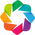

In [40]:
import holoviews as hv
hv.extension('bokeh')

def get_sankey(df, cat_cols=[], value_cols='', title='Sankey Diagram'):
    # Colors
    colorPalette = ['rgba(31, 119, 180, 0.8)',
     'rgba(255, 127, 14, 0.8)',
     'rgba(44, 160, 44, 0.8)',
     'rgba(214, 39, 40, 0.8)',
     'rgba(148, 103, 189, 0.8)',
     'rgba(140, 86, 75, 0.8)',
     'rgba(227, 119, 194, 0.8)',
     'rgba(127, 127, 127, 0.8)']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
 
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
 
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum

    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
 
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
 
    # creating data for the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
            pad = 15,
            thickness = 20,
            line = dict(
                color = "black",
                width = 0.5
            ),
            label = labelList,
            color = colorList
        ),
        link = dict(
            source = sourceTargetDf['sourceID'],
            target = sourceTargetDf['targetID'],
            value = sourceTargetDf['count']
        )
    )
    
    # override gray link colors with 'source' colors
    opacity = 0.4
    # change 'magenta' to its 'rgba' value to add opacity
    data['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['node']['color']]
    data['link']['color'] = [data['node']['color'][src].replace("0.8", str(opacity))
                                        for src in data['link']['source']]
    
    
    fig = go.Figure(data=[go.Sankey(
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['node']['label'],
      color =  data['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['link']['source'],
      target =  data['link']['target'],
      value =  data['link']['value'],
      color =  data['link']['color']
    ))])
    
    fig.update_layout(title_text=title, font_size=10)
    
    return fig.show(renderer='iframe')


# To create a Sankey diagram for the taxon lineage:
def sankey_hv():
    sankey_df = all_genomes_tax_df.groupby(features).count().toPandas()
    sankey_df = sankey_df.rename(columns={'count': 'value'})
    edges = pd.read_csv('data/health-breakup2.csv')
    sankey = hv.Sankey(edges, label='A Breakout of National Health Care Expenditures')
    sankey.opts(label_position='left', edge_color='target', node_color='index', cmap='tab20')

In [43]:
sankey_df = all_genomes_tax_df.groupby(features).count().toPandas()
sankey_df = sankey_df.rename(columns={'count': 'value'})
sankey_df.head()

,domain,phylum,class,order,family,genus,species,value
0,d__Bacteria,p__Bacillota,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Limosilactobacillus,s__Limosilactobacillus portuensis,2
1,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Lactococcus,s__Lactococcus petauri,1
2,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,s__Streptococcus mitis_D,1
3,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Limosilactobacillus,s__Limosilactobacillus coleohominis,2
4,d__Bacteria,p__Bacillota,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactiplantibacillus,s__Lactiplantibacillus plantarum,2


In [51]:
sankey = hv.Sankey(sankey_df[['phylum', "species", "value"]], label='Taxon Lineage')
sankey.opts(width=600, height=400)

:Sankey   [phylum,species]   (value)

In [52]:
# Convert Spark DataFrame to Pandas DataFrame:
pdf = all_genomes_tax_df.select(features).groupby(features).count().toPandas()

### Representation of a sample of the genomes present in the dataset: example from the order of the Lactobacillales.

In [54]:
pdf_lactobacillales = all_genomes_tax_df.filter(F.col('order')=='o__Lactobacillales').select(features).groupby(features).count().toPandas()
# fig_l = get_sankey(pdf_lactobacillales,cat_cols=features[0:6], value_cols='count',title='Genomes from the Lactobacillales order')

# Note that there are too many distinct species in the Lactobacillales order to show individually:
all_genomes_tax_df.filter(F.col('order')=='o__Lactobacillales').select('species').distinct().count()


270


### Information such as genome length or GC-content can also be represented

We can group and visualise these at different levels like family, genus, species... depending on the number of sequences available and on the biological significance.


In [55]:
lactobacillales_df = all_genomes_tax_df.filter(F.col('order')=='o__Lactobacillales').orderBy('family').toPandas()
lactobacillales_count = all_genomes_tax_df.filter(F.col('order')=='o__Lactobacillales').groupby('family').count().orderBy('family').toPandas()
lactobacillales_count

,family,count
0,f__Aerococcaceae,29
1,f__Carnobacteriaceae,4
2,f__Enterococcaceae,50
3,f__Lactobacillaceae,244
4,f__Listeriaceae,5
5,f__Streptococcaceae,140
6,f__Vagococcaceae,4


Text(0.5, 0.98, 'Number of genomes avalaible, genome length and GC-content of bacteria belonging the Lactobacillales order')

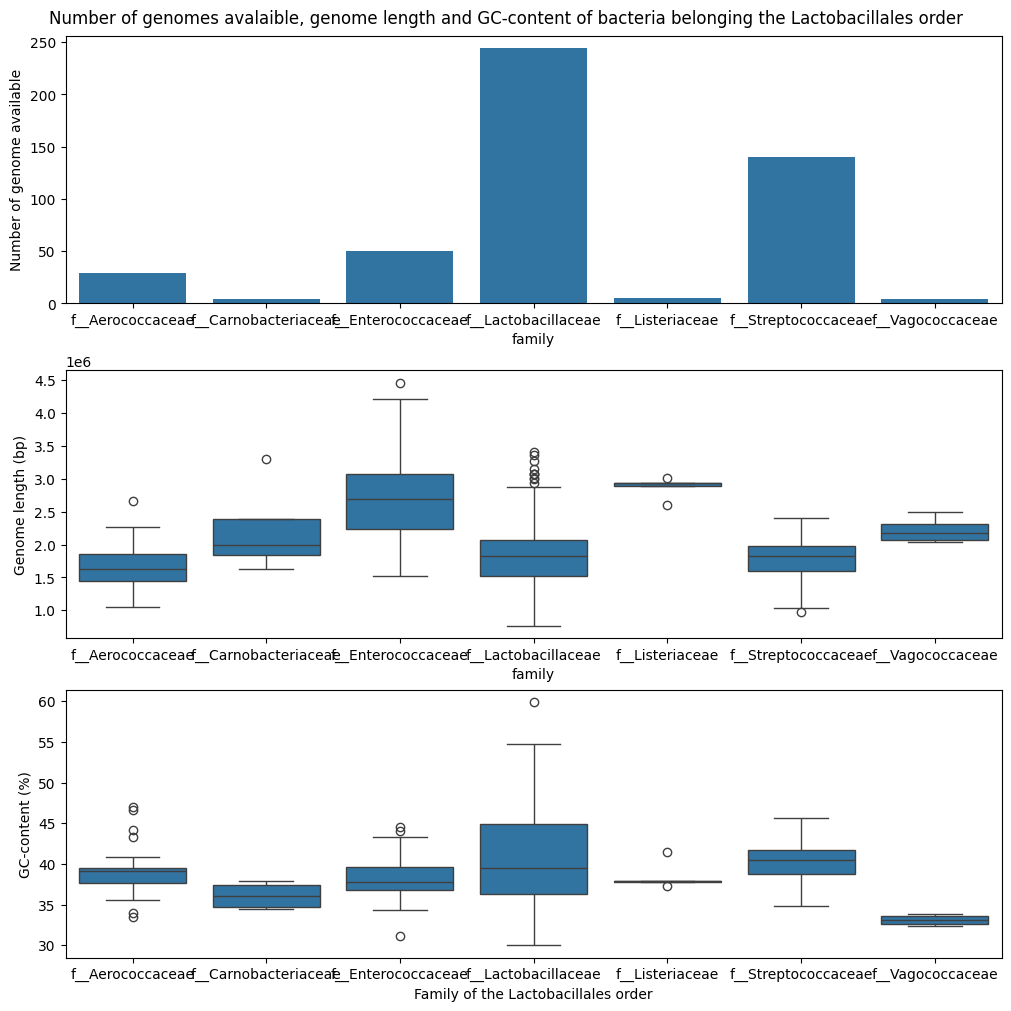

In [56]:
fig = plt.figure(figsize=(10, 10), layout="constrained")
spec = fig.add_gridspec(3, 1)

ax00 = fig.add_subplot(spec[0, 0])
sns.barplot(data=lactobacillales_count, x='family', y='count')
plt.ylabel("Number of genome available")

ax10 = fig.add_subplot(spec[1, 0])
sns.boxplot(data=lactobacillales_df, x='family', y='attributes.length')
plt.ylabel("Genome length (bp)")
#plt.xlabel("Family of the Lactobacillales order")

ax20 = fig.add_subplot(spec[2, 0])
sns.boxplot(data=lactobacillales_df, x='family', y='attributes.gc-content')
plt.ylabel("GC-content (%)")
plt.xlabel("Family of the Lactobacillales order")


fig.suptitle('Number of genomes avalaible, genome length and GC-content of bacteria belonging the Lactobacillales order')


Text(0.5, 0.98, 'Biome and Catalogue related to bacteria belonging the Lactobacillales order')

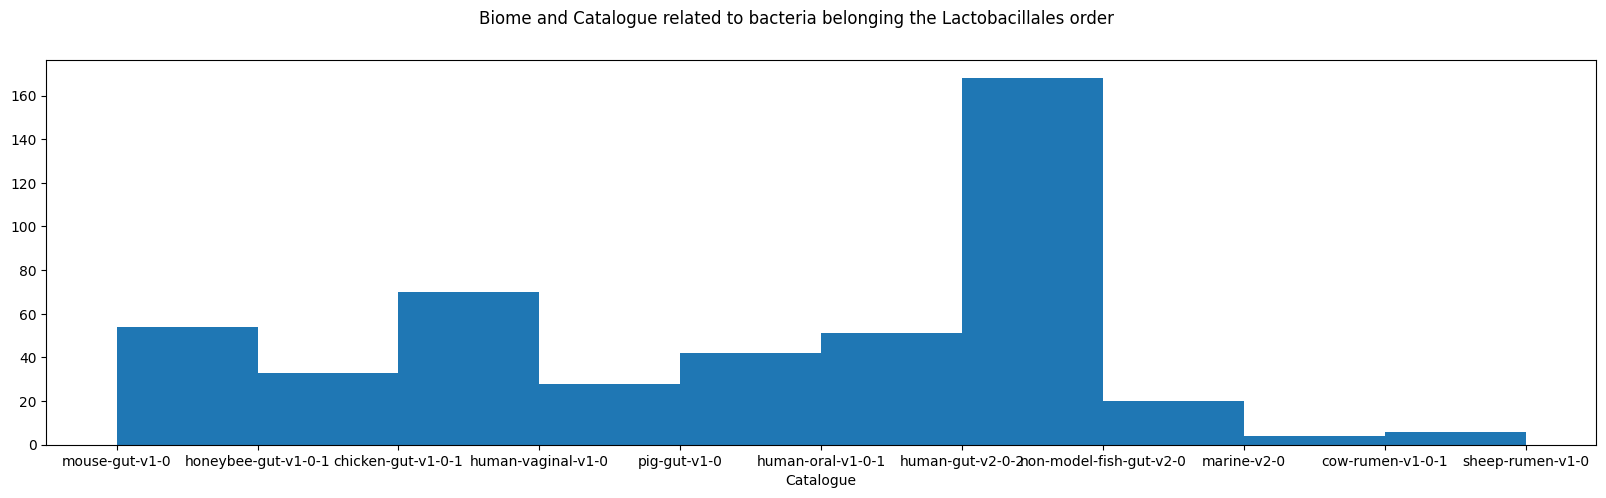

In [57]:
fig = plt.figure(figsize=(20, 5))
spec = fig.add_gridspec(1, 2)

#ax00 = fig.add_subplot(spec[0, 0])
#lactobacillales_df['relationships.biome.data.id'].hist()
#plt.xlabel("Biome")

ax01 = fig.add_subplot(spec[0:])
lactobacillales_df['relationships.catalogue.data.id'].hist()
plt.xlabel("Catalogue")
ax01.grid(False)

fig.suptitle('Biome and Catalogue related to bacteria belonging the Lactobacillales order')

### Another example: produce a quality control figure similar to Extended Data Fig. 4a of [Almeida et al 2020](https://www.nature.com/articles/s41587-020-0603-3/figures/10)

In [58]:
qc_df = all_genomes_tax_df.toPandas()
qc_df[['attributes.completeness', 'attributes.contamination']].describe()

,attributes.completeness,attributes.contamination
count,476.000000,476.000000
mean,92.334289,0.785733
std,10.795861,1.049299
min,50.060000,0.000000
25%,89.247500,0.000000
50%,97.400000,0.378679
75%,99.220000,1.090000
max,100.000000,4.891304


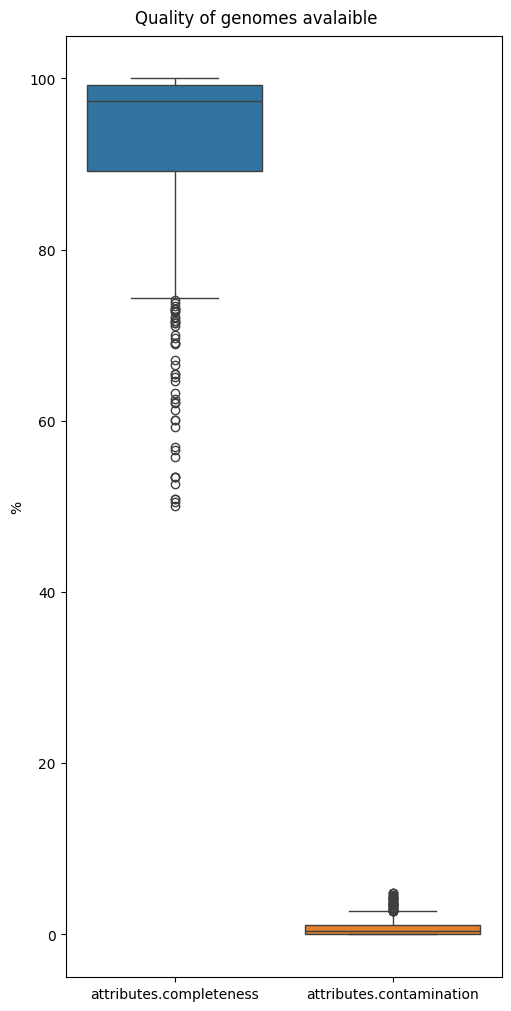

In [59]:
fig = plt.figure(figsize=(5, 10), layout="constrained")
spec = fig.add_gridspec(1, 1)

ax00 = fig.add_subplot(spec[0, 0])
sns.boxplot(data=qc_df[['attributes.completeness', 'attributes.contamination']])
plt.ylabel("%")


fig.suptitle('Quality of genomes avalaible')


## Find out whether your own MAGs are novel compared to the MGnify catalogues

Another use for the MGnify genomes resource is to query your own MAG against MGnify's MAG catalogues, to see whether they are novel or already represented.
List directories of the files to be analysed:

Replace the str with your own path to folder containing your files. * allows to query all the file with the .fa extension.


In [60]:
files = glob.glob('../data/input_gecco/*.fa')
files

['../data/input_gecco/EMOBON00092_final_V2.contigs.fa']


### Compute a sourmash sketch for each MAG

Create "sketches" for each MAG using Sourmash

A sketch goes into a signature, that we will use for searching. The signature is a sort of collection of hashes that are well suited for calculating the containment of your MAGs within the catalogue's MAGs.


In [61]:
for mag in files:
    # The sourmash parameters are chosen to match those used within MGnify
    sketch = sourmash.MinHash(n=0, ksize=31, scaled=1000)
    
    # A fasta file may have multiple records in it. Add them all to the sourmash signature.
    for index, record in enumerate(SeqIO.parse(mag, 'fasta')):
        sketch.add_sequence(str(record.seq))
        
    # Save the sourmash sketch as a "signature" file
    signature = sourmash.SourmashSignature(sketch, name=record.name)
    with open(pp(pp(mag).name).stem + '.sig', 'wt') as fp:
        sourmash.save_signatures([signature], fp)

ValueError: invalid DNA character in input k-mer: TACTGAGGGCCAACCGCCCCATTGACCGAAF


## Fetch all of the catalogue IDs currently available on MGnify

To fetch the catalogue IDs to the MGnify API, use the following endpoint: https://www.ebi.ac.uk/metagenomics/api/v1/genome-catalogues.


In [62]:
catalogue_endpoint = "genome-catalogues"

In [63]:
with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    catalogues = map(lambda r: r.json, mgnify.iterate(catalogue_endpoint))
    catalogues = pd.json_normalize(catalogues)

In [64]:
catalogue_ids = list(catalogues['id'])
catalogue_ids

['chicken-gut-v1-0-1',
 'cow-rumen-v1-0-1',
 'honeybee-gut-v1-0-1',
 'human-gut-v2-0-2',
 'human-oral-v1-0-1',
 'human-vaginal-v1-0',
 'marine-v2-0',
 'mouse-gut-v1-0',
 'non-model-fish-gut-v2-0',
 'pig-gut-v1-0',
 'sheep-rumen-v1-0',
 'zebrafish-fecal-v1-0']


## Submit a search job to the MGnify API

Tosubmit a job to the MGnify API, use the following endpoint: https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/gather.
Data will be send to the API, which is called "POST"ing data in the API world.
This part of the API is quite specialized and so is not a formal JSON:API, the requests Python packageìs therefore used to communicate with it.


In [65]:
endpoint = 'https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/gather'

In [66]:
# Create a list of file uploads, and attach them to the API request
signatures = [open(sig, 'rb') for sig in glob.glob('*.sig')]
sketch_uploads = [('file_uploaded', signature) for signature in signatures]

# Send the API request - it specifies which catalogue to search against and attaches all of the signature files.
submitted_job = requests.post(endpoint, data={'mag_catalogues': catalogue_ids}, files=sketch_uploads).json()


map(lambda fp: fp.close(), signatures)  # tidy up open file pointers

print(submitted_job)

{'data': {'message': 'Your files  were successfully uploaded. Use the given URL to check the status of the new job', 'job_id': 'a2469988-9b39-4435-9c3c-07fcbca16d19', 'children_ids': {}, 'signatures_received': [], 'status_URL': 'https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/status/a2469988-9b39-4435-9c3c-07fcbca16d19'}}


In [71]:
job_done = False
while not job_done:
    print('Checking status...')
    # The status_URL is another API endpoint that's unique for the submitted search job
    query_result = None
    
    while not query_result:
        query_result = requests.get(submitted_job['data']['status_URL'])
        print('Still waiting for jobs to complete. Current status of jobs')
        print('Will check again in 2 seconds')
        time.sleep(2) 
        
    queries_status = {sig['job_id']: sig['status'] for sig in query_result.json()['data']['signatures']}
    job_done = all(map(lambda q: q == 'SUCCESS', queries_status.values()))
    
print('Job done!')

Checking status...
Still waiting for jobs to complete. Current status of jobs
Will check again in 2 seconds
Job done!


In [74]:
query_result_df = pd.json_normalize(query_result.json()['data']['signatures'])
query_result_df

""


In [73]:
matches = query_result_df.dropna(subset=['result.match'])
matches

KeyError: ['result.match']